## Семінарське заняття №3: Непараметричні оцінки розподілу. Теоретичні та вибіркові квантилі.

**Задача №1. (буде в дз)**

Нехай $X = (X_1, ..., X_n)$ -- кратна вибірка з функцією розподілу $F(x)$. Через $a = \{a_k\}_{k=1}^n$ позначимо вагові коефіцієнти, тобто $a_k \geq 0$ та $\sum_{k = 1}^n a_k = 1$. Розглянемо *зважену емпіричну функцію розподілу* :

$\hat{F}_n(x;a) = \sum_{k = 1}^n a_k 1\{X_k < x\}, x \in \mathbb{R}$ 

1. Спростіть $\sup\limits_{x \in \mathbb{R}}|\hat{F}_n(x;a) - \hat{F}_n(x;b)|$ 
2. Знайдіть $E[\hat{F}_n(x;a)]$.
3. Нехай $X_j$ має функцію розподілу $F_m(x)$ з ймовірністю $p_m$, $m = 1,2$. Якими мають бути вагові коефіцієнти $a$, щоб $\hat{F}_n(x;a)$ була незміщеною оцінкою для $F_m(x)$? 
4. Опишіть програму для підрахунку $\sup\limits_{x \in \mathbb{R}}|\hat{F}_n(x;a) - \hat{F}_n(x;b)|$.
5. Реалізуйте підрахунок навантаженої емпіричної функції розподілу.

**Задача №2.**

Нехай $X = (X_1, ..., X_n)$ -- кратна вибірка з розподілу, для якого існує неперервна обмежена щільність $f(x)$. Розглянемо ядерну оцінку щільності:

$\hat{f}_n(x) = \dfrac{1}{nh}\sum_{j=1}^n K\left(\dfrac{X_j - x}{h}\right), x \in \mathbb{R}$

де $h = n^{-1/5}$ -- параметр згладжування, $K(x) = 3/4 \cdot 1_{[-1,1]}(x)(1 - x^2)$ -- ядро оцінки.

1. Обчисліть математичне сподівання та дисперсію $\hat{f}_n(x)$.
2. Доведіть, що $\hat{f}_n(x)$ є конзистентною оцінкою $f(x)$ для $x \in \mathbb{R}$.


In [1]:
kde.func <- function(x, h, K)
{
    n <- length(x)
    return.func.univariate <- function(x0)
    {
        sum(K((x - x0) / h)) / (n * h)
    }
    return.func <- function(x0) sapply(x0, return.func.univariate)
    return.func
}

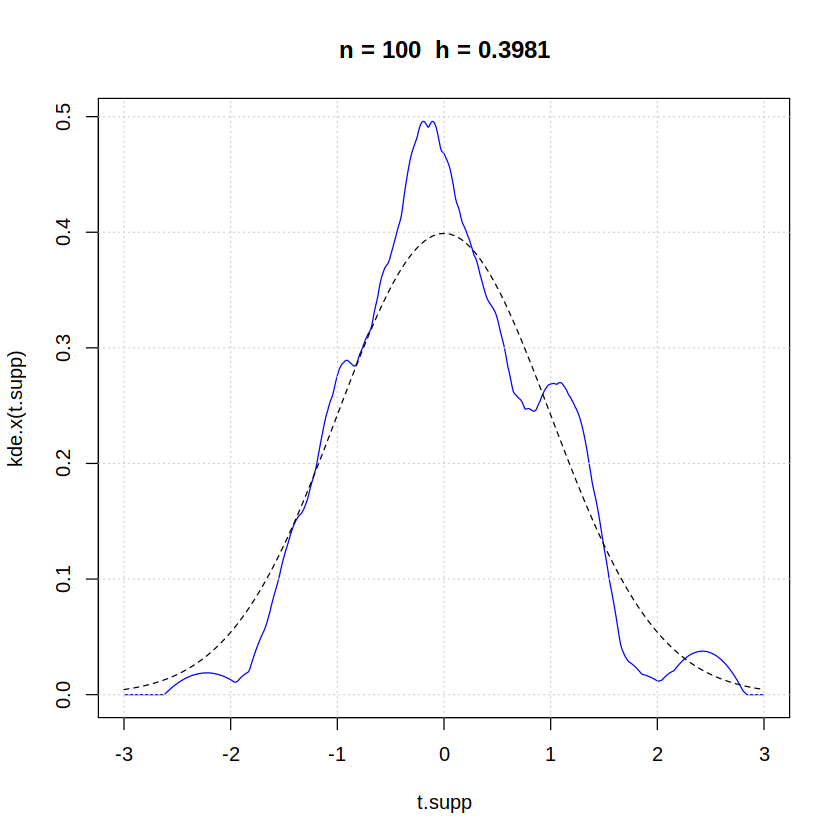

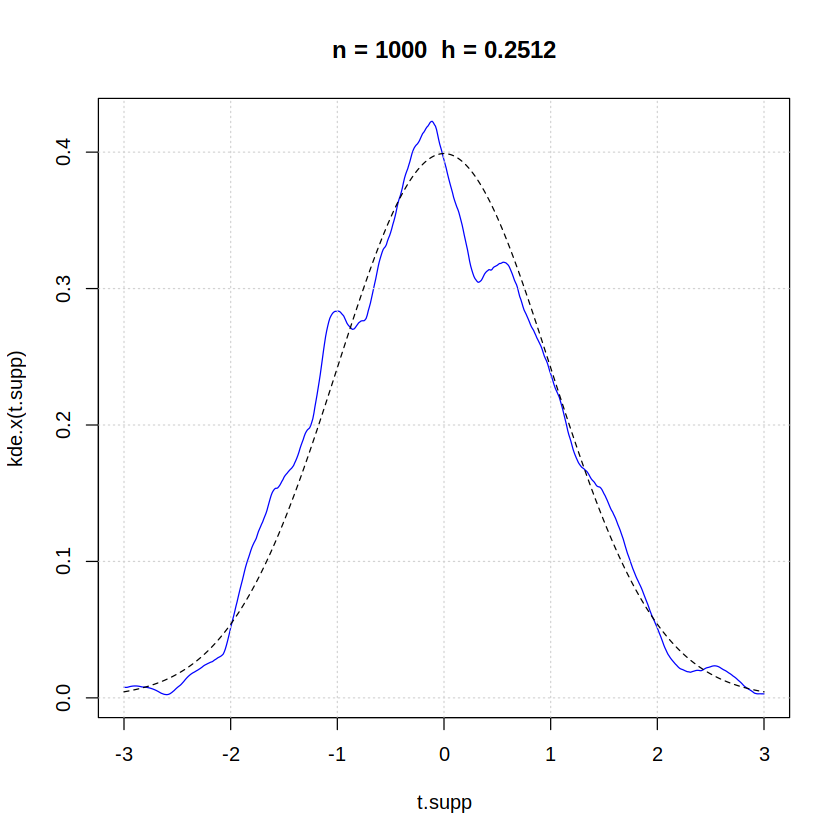

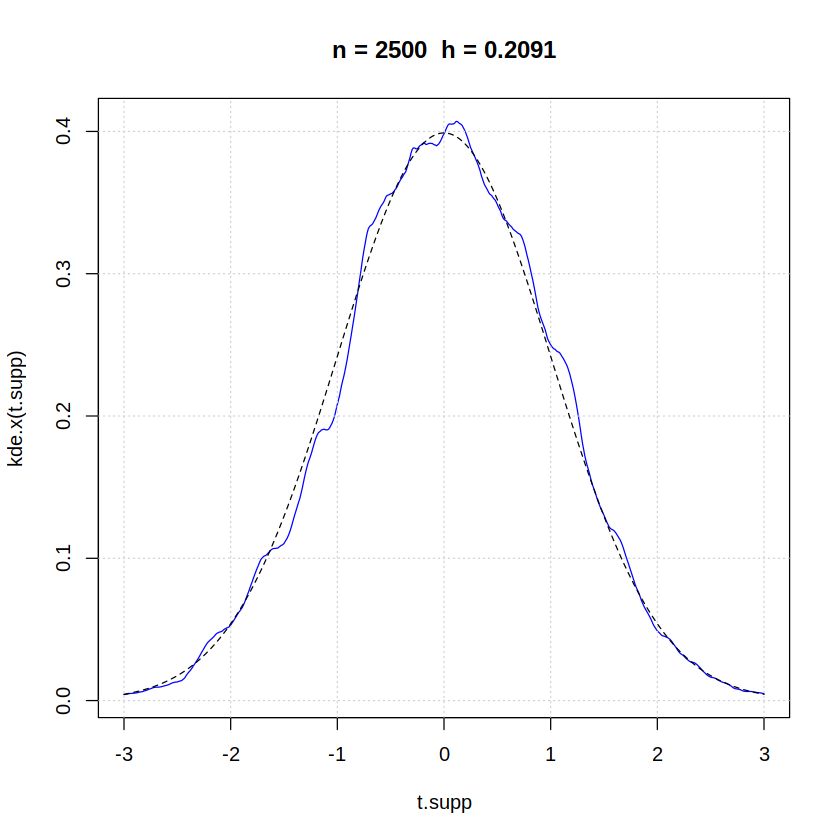

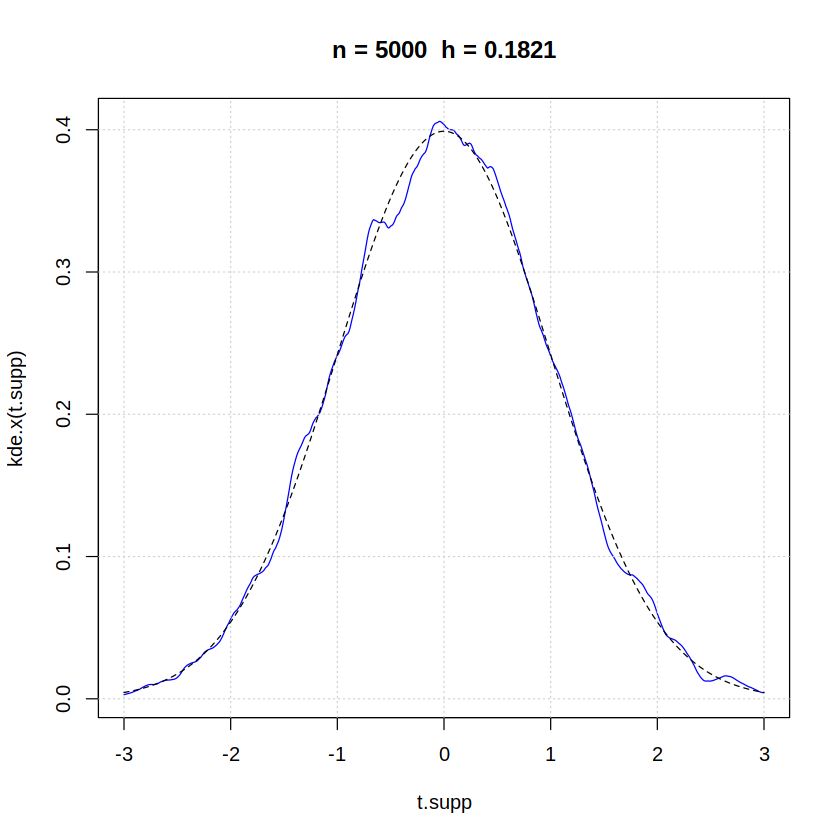

In [2]:
set.seed(0)
t.supp <- seq(-3, 3, 0.01)
K <- function(t) (abs(t) < 1) * (1 - t^2) * 3 / 4

for(n in c(100, 1000, 2500, 5000))
{
    h <- n^(-1/5)
    x <- rnorm(n)
    kde.x <- kde.func(x, h, K)
    plot(t.supp, kde.x(t.supp), type='l', col='blue', main=paste("n =", n, " h =", round(h, 4))); grid()
    lines(t.supp, dnorm(t.supp), col='black', lty=2)
}

**Задача №3**

Нехай $\xi \sim N(0,1)$ та $Q(x)$ -- квантільна функція розподілу $\xi$. Для $\mu \in \mathbb{R}$ та $\sigma > 0$ розглянемо $\eta = \mu + \sigma \xi$. Як можна виразити квантільну функцію розподілу $\eta$ через $Q(x)$?

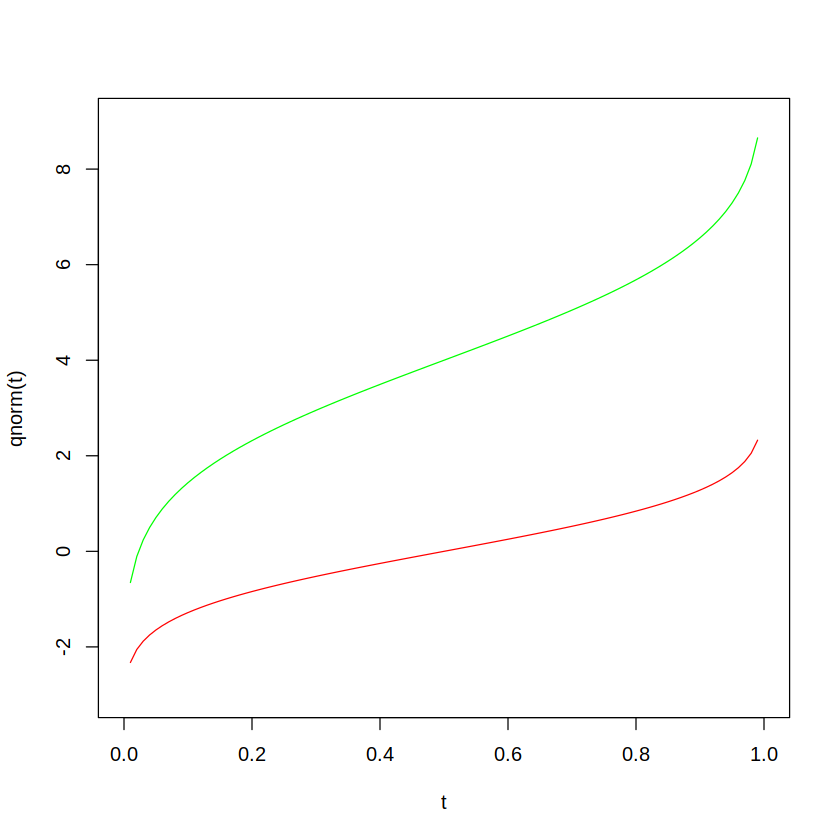

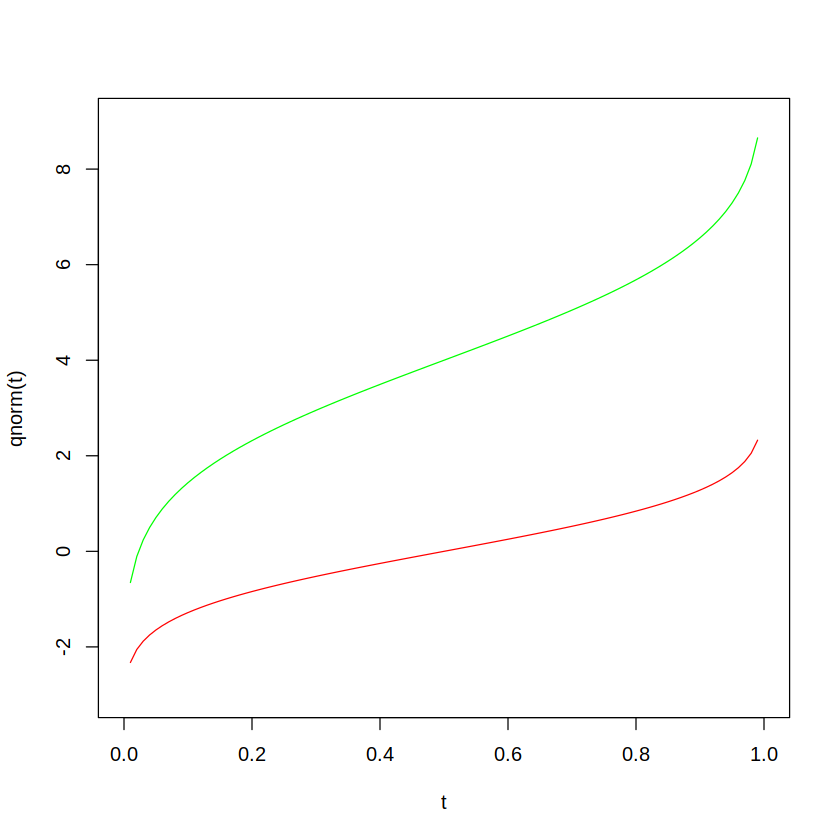

In [3]:
t <- seq(0, 1, 0.01)

plot(t, qnorm(t), col='red', ylim=c(-3, 9), type='l')
lines(t, qnorm(t, mean=4, sd=2), col='green')

plot(t, qnorm(t), col='red', ylim=c(-3, 9), type='l')
lines(t, 4 + 2 * qnorm(t), col='green')

**Задача №4**

Нехай $\xi \sim \text{Exp}(\lambda)$, $\lambda > 0$. Знайти квантільну функцію розподілу $\xi$.

In [4]:
quantile.exp <- function(p, intensity)
{
    - log(1 - p) / intensity
}
quantile.exp.vect <- Vectorize(quantile.exp, vectorize.args="p")

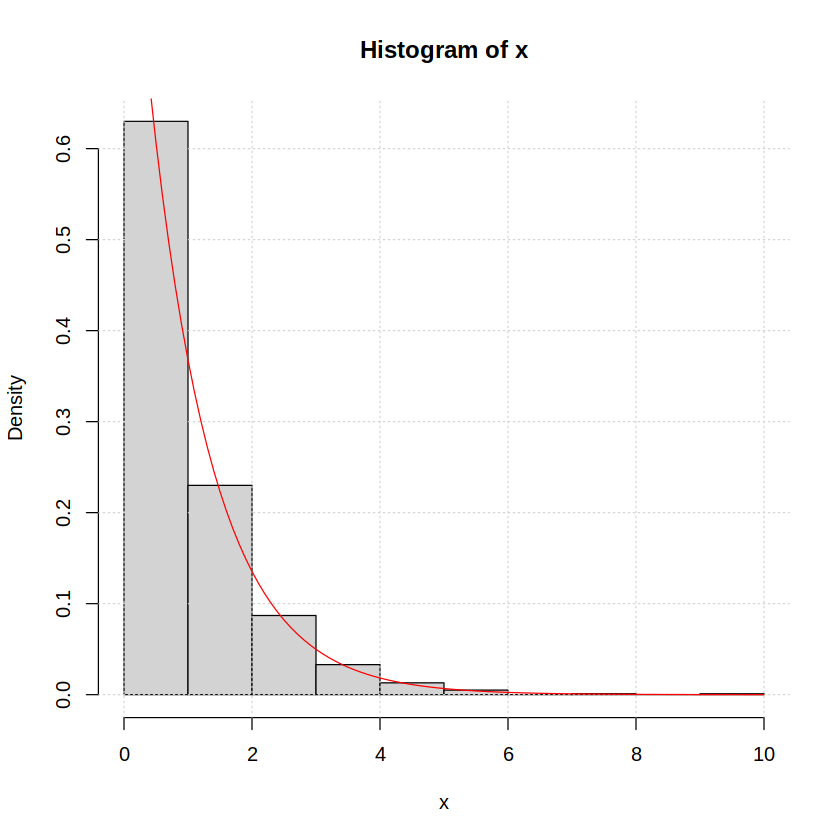

In [12]:
set.seed(0)
n <- 1000
lambda.val <- 1

u <- runif(n)
x <- quantile.exp(u, intensity=lambda.val)

hist(x, prob=T); grid()
curve(dexp(x, rate=lambda.val), col='red', add=T)

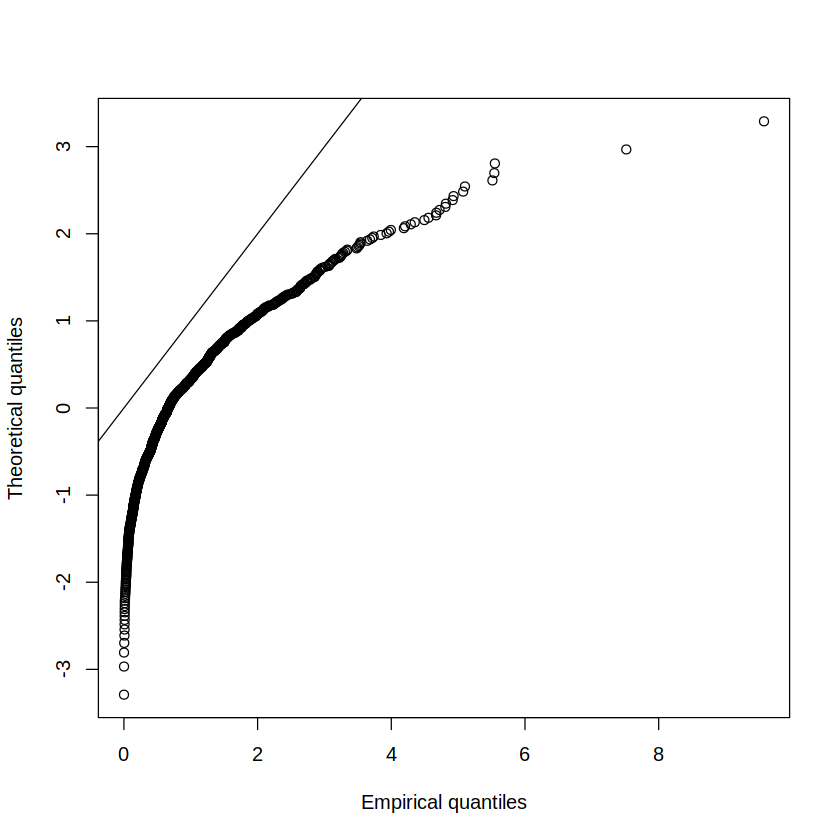

In [14]:
sort.x <- sort(x)

prob.levels <- (1:n - 0.5) / n

plot(
    sort.x, qexp(prob.levels), 
    xlab='Empirical quantiles', ylab='Theoretical quantiles'
)
abline(0,1)

**Задача №5**

Нехай $X = (X_1, \ldots, X_n)$ -- кратна вибірка з експоненційного розподілу $\text{Exp}(\theta)$, де $\theta > 0$ є невідомим параметром інтенсивності, який треба оцінити. Побудуйте оцінку для параметра інтенсивності, використовуючи метод квантилів. Дослідіть конзистентність оцінки.

In [6]:
quantile.estim <- function(sampl.quantile.p, p)
{
    - log(1 - p) / sampl.quantile.p
}

In [7]:
set.seed(0)

n <- 1000
theta <- 4
x <- rexp(n, rate=theta)
theta.estim <- quantile.estim(median(x), 0.5)
theta.estim

[1] 3.785534

In [8]:
# Імітаційний експеримент
n <- 1000

# Кількість повторних вибірок
B <- 1000

theta.estim.copies <- replicate(
    B, quantile.estim(median(rexp(n, rate=theta)), 0.5)
)

In [15]:
head(theta.estim.copies)

[1] 4.004772 3.759527 4.365887 3.891229 4.132842 4.192910

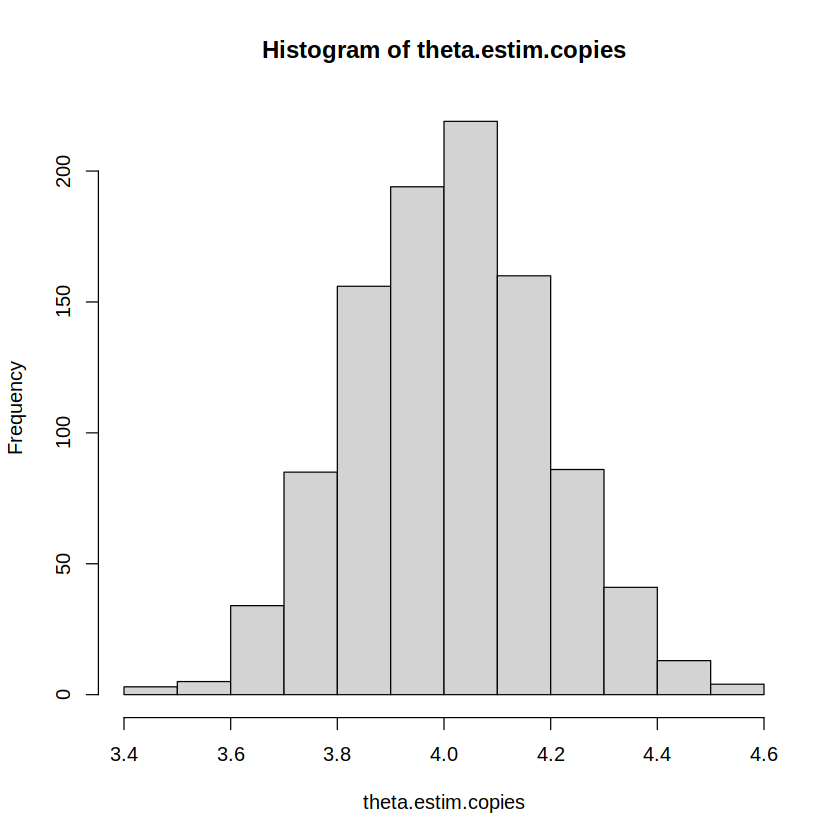

In [10]:
hist(theta.estim.copies)

**Задача №6**

QQ-діаграма.

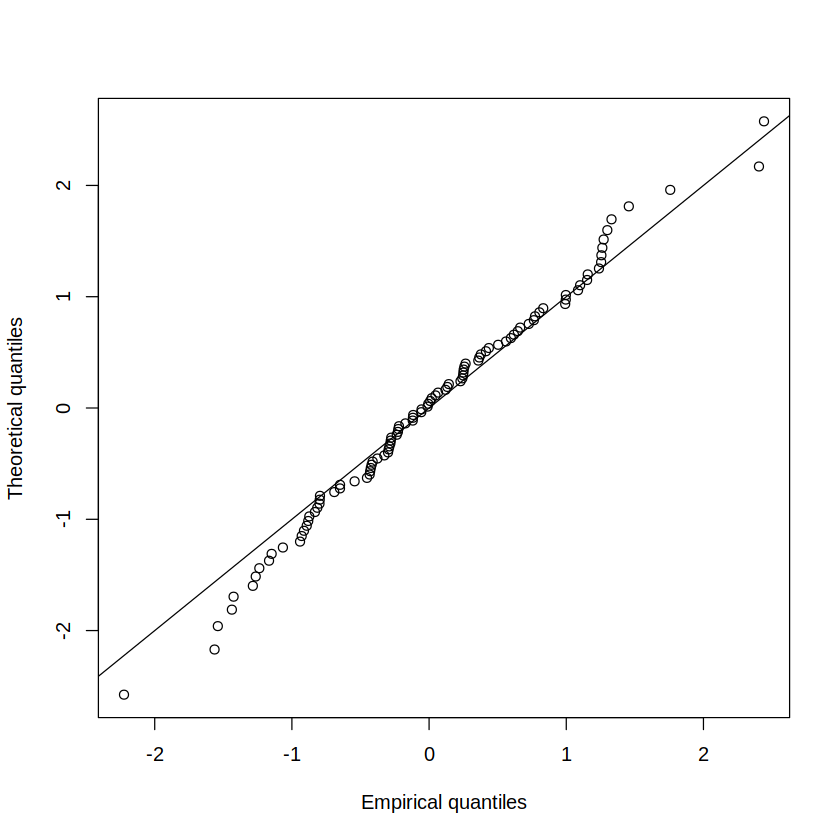

In [11]:
set.seed(0)

n <- 100

x <- rnorm(n)
sort.x <- sort(x)

prob.levels <- (1:n - 0.5) / n

plot(
    sort.x, qnorm(prob.levels), 
    xlab='Empirical quantiles', ylab='Theoretical quantiles'
)
abline(0,1)